In [4]:

from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)
'''
GET READY 
'''
SHAPEVERSION=3


from eden.converter.fasta import fasta_to_sequence
import itertools
def rfam_uri(family_id):
    return 'http://rfam.xfam.org/family/%s/alignment?acc=%s&format=fastau&download=0'%(family_id,family_id)
def rfam_uri(family_id):
    return '%s.fa'%(family_id)
 
def get_graphss(rfam_id = '../toolsdata/RF00005'):
    return fasta_to_sequence(rfam_uri(rfam_id))

def get_graphs(rfam_id = '../toolsdata/RF00005', count=100):
    for a,b in itertools.islice( get_graphss(rfam_id),count):
        yield b

from eden.converter.fasta import fasta_to_sequence
def get_sequences(size=9999):
    sequences = itertools.islice( fasta_to_sequence("../toolsdata/RF00005.fa"), size)
    return [ b for (a,b) in sequences ]

def get_sequences_with_names(size=9999):
    sequences = itertools.islice( fasta_to_sequence("../toolsdata/RF00005.fa"), size)
    return sequences


# imports for later
import graphlearn.abstract_graphs.RNA as rna
from  graphlearn.feasibility import FeasibilityChecker as Checker
from graphlearn.estimator import Wrapper
import numpy
from graphlearn.utils import evaltools
from eden.util import random_bipartition_iter
import random

def oneclasstest_fraction(fraction=0.1,repeats=2):
    # choosing some graphs, 
    # having array to save results
    
    repeatresgood=[]
    repeatresstd=[]
 
    for i in range(repeats):
        badscores=[]
        goodscores=[]
        graphs = get_sequences_with_names(size=100)
        graphs,not_used = random_bipartition_iter(graphs,fraction,random_state=random.random()*i*1000)

        estimator=Wrapper( nu=.27, cv=3, n_jobs=-1,calibrate=True)
        sampler=rna.AbstractSampler(radius_list=[0,1],
                                    thickness_list=[2], 
                                    min_cip_count=1, 
                                    min_interface_count=2, 
                                    preprocessor=rna.PreProcessor(base_thickness_list=[1],ignore_inserts=True), 
                                    postprocessor=rna.PostProcessor(),
                                    estimator=estimator)
        sampler.preprocessor.set_param(sampler.vectorizer)
        graphmanagers = sampler.preprocessor.fit_transform(graphs)
        sampler.estimatorobject.fit(graphmanagers,vectorizer=sampler.vectorizer,
                                    random_state=sampler.random_state)

        #test
        for graphman in graphmanagers:
            struct = evaltools.dotbracket_to_shape(graphman.structure,shapesversion=SHAPEVERSION)
            score =  sampler.estimatorobject.score(graphman)
            if struct=="[[][][]]":
                goodscores.append(score)
            else:
                badscores.append(score)
                
        
        repeatresgood.append(numpy.mean(goodscores)/numpy.mean(badscores))
        repeatresstd.append(numpy.std(goodscores+badscores))   
        '''
        print "afraction=%f , instances=%f, good=%d , bad=%d" % (fraction,fraction*923,len(goodscores),len(badscores))
        a= numpy.array(badscores)
        print 'bad:mean/std ',numpy.mean(a, axis=0),' ',numpy.std(a, axis=0)
        
        a= numpy.array(goodscores)
        print 'cgood:mean/std ',numpy.mean(a, axis=0),' ',numpy.std(a, axis=0)
        
        a= numpy.array(goodscores+badscores)
        print 'dbad+good:mean/std ',numpy.mean(a, axis=0),' ',numpy.std(a, axis=0)
        print ''
        '''
    return numpy.mean(repeatresgood),numpy.mean(repeatresstd)
        
        
        
goods=[]
means=[]
fracs=range(2,11)
         
for frac in fracs:
        fraction=frac*.1
        good, mean = oneclasstest_fraction(fraction,repeats=5)
        goods.append(good)
        means.append(mean)
import pylab
bars = pylab.bar(fracs, goods, color='#88aa33', align='center')
line = pylab.plot(x, means, 'bo-')

NameError: name 'x' is not defined

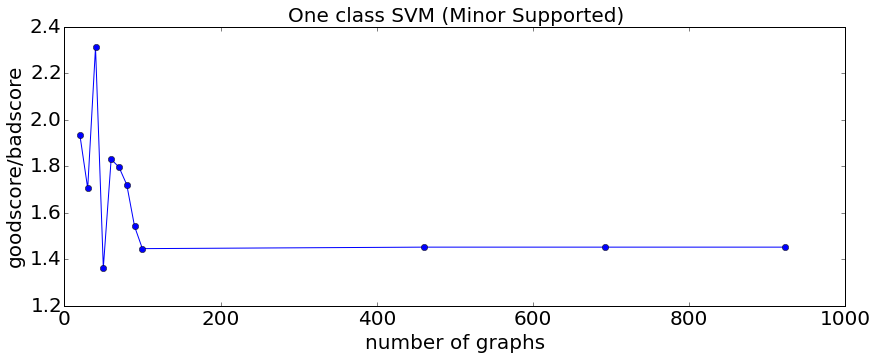

In [28]:
import pylab
%matplotlib inline
#fracs=[f*10 for f in fracs]
pylab.figure(figsize=(14, 5))
#bars = pylab.bar(fracs, goods, color='#88aa33', align='center',width=9)

ax = pylab.subplot() 
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(20)


line = pylab.plot(fracs, goods, 'bo-')
pylab.ylabel('goodscore/badscore',fontsize=20)
pylab.xlabel('number of graphs',fontsize=20)
pylab.title('One class SVM (Minor Supported)',fontsize=20)

In [7]:
print fracs
print goods
print means

[2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.934687402297492, 1.7052750857022132, 2.3114325343110314, 1.3636574219026256, 1.8300367664529027, 1.7967481830998806, 1.7208706244569885, 1.5412711170471194, 1.4458838942135182]
[0.29263143993330337, 0.31679271499884587, 0.31858564707995446, 0.27180992427249917, 0.35238675637796579, 0.34570123997205754, 0.35968415216091326, 0.32129456905503379, 0.34444982900587268]


In [22]:
goods+=[1.4523323708504292, 1.4523323708504292, 1.4523323708504292]

fracs+=[461, 692, 923]